<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Clases/20SepGraficasR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(ggplot2)
library(scales)
library(RColorBrewer)

In [ ]:
str(mpg)
head(mpg, n=10)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


# Gráficas de datos unidimensionales

$x
[1] "Tipo de vehículo"

attr(,"class")
[1] "labels"

$y
[1] "Total"

attr(,"class")
[1] "labels"

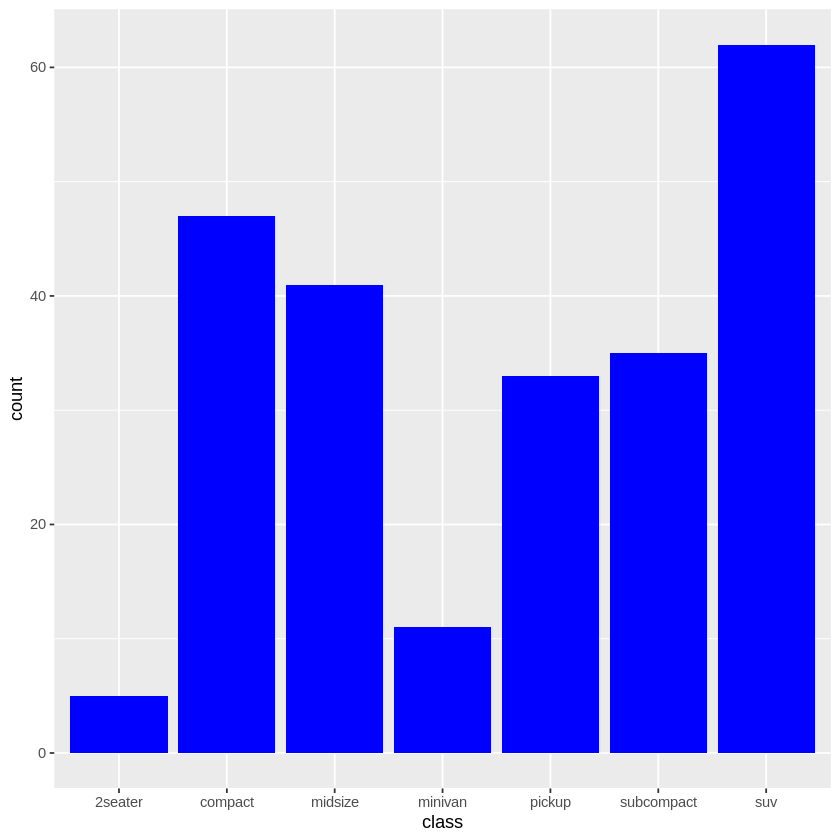

In [ ]:
ggplot(mpg) +
  geom_bar(aes(x=class), fill='blue')
  xlab('Tipo de vehículo')
  ylab('Total')

ERROR: ignored

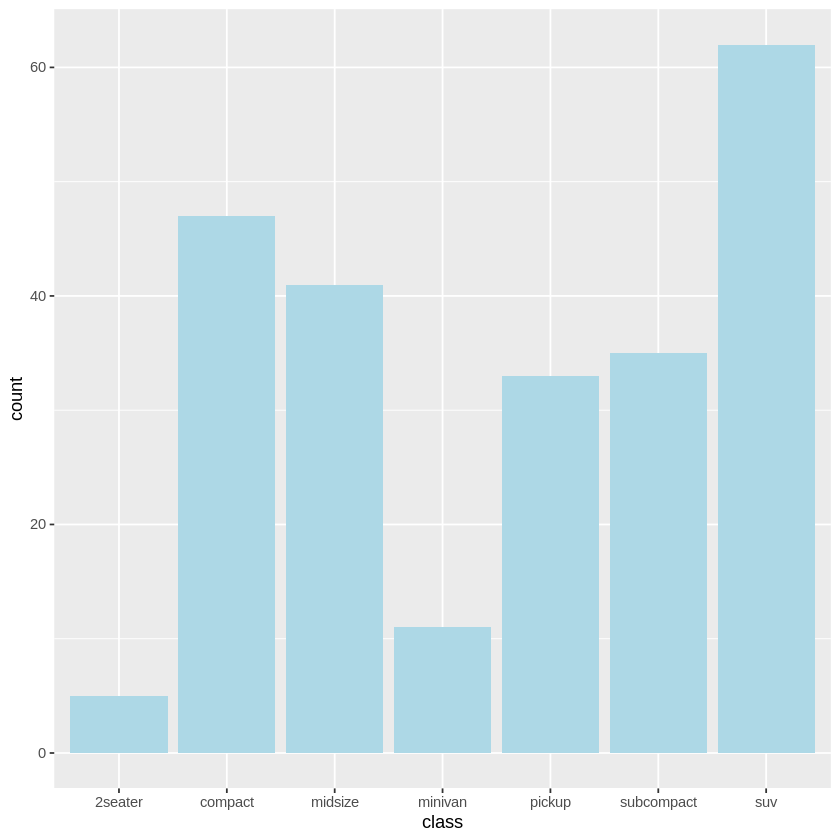

In [ ]:
ggplot(mpg) +
  geom_bar(aes(x=class), fill='lightblue')
  xlab('Tipo de vehículo') +
  ylab('Total') +
  theme(text=element_text(size = 20))

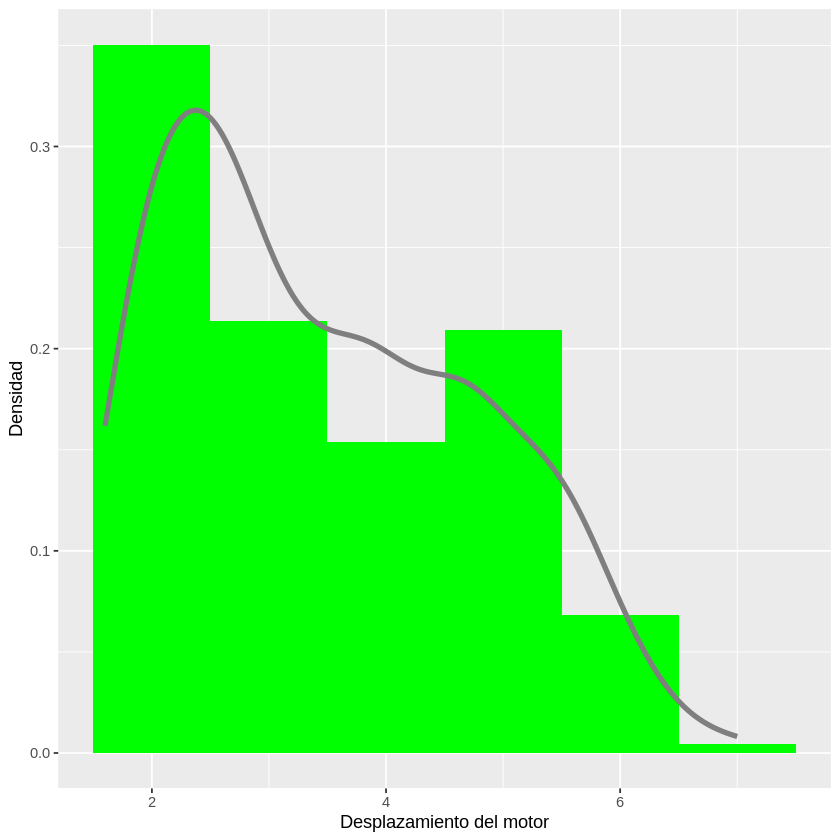

In [ ]:
ggplot(mpg, aes(x=displ)) +
  geom_histogram(aes(y=..density..),binwidth = 1, fill='green') +
  geom_line(stat='density', col='gray50', size=1.5) +
  ylab('Densidad') +
  xlab('Desplazamiento del motor')

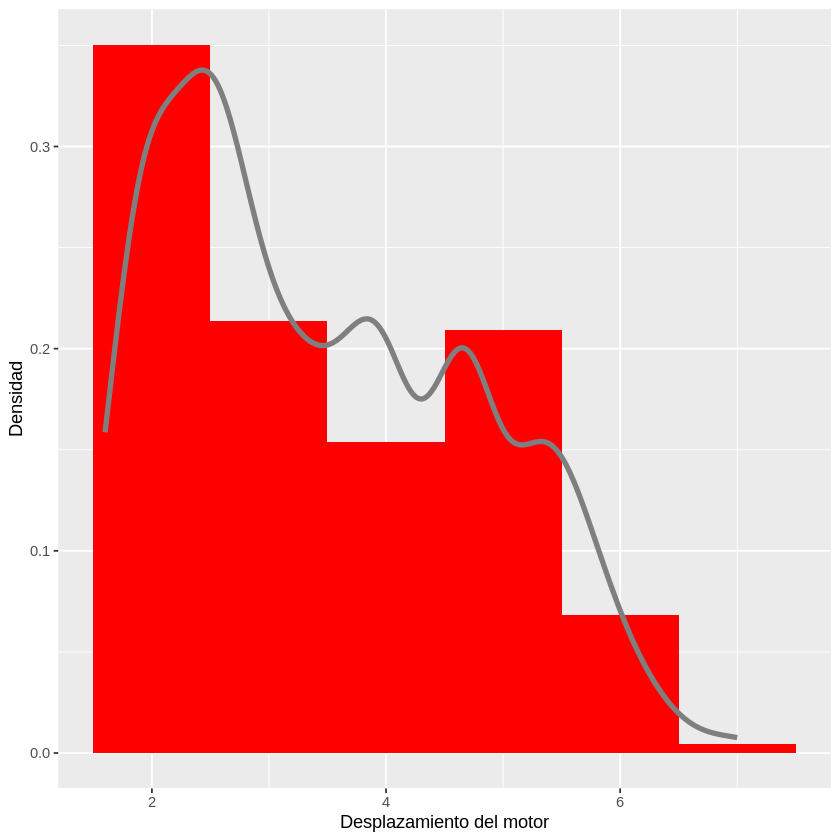

In [ ]:
ggplot(mpg, aes(x=displ)) +
  geom_histogram(aes(y=..density..), binwidth = 1, fill='red') +
  geom_line(stat='density', col='gray50', size=1.5, bw='SJ') +
  ylab('Densidad') +
  xlab('Desplazamiento del motor')

# Gráficas de datos bivariados y multivariados

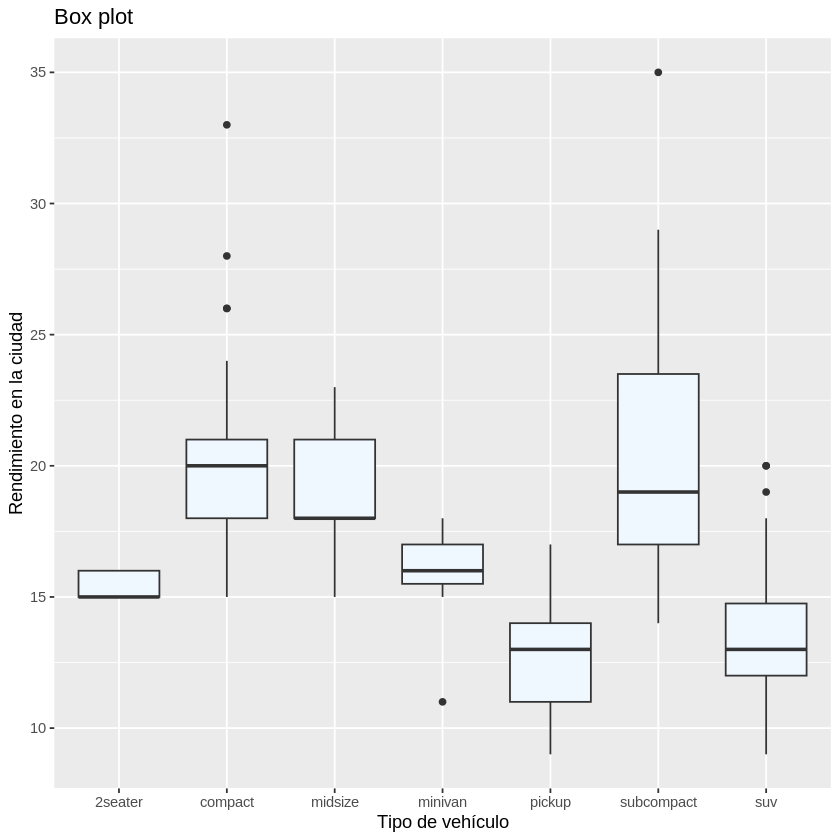

In [ ]:
# Los puntos son los valores atípicos
ggplot(data=mpg, aes(class,cty)) +
  geom_boxplot(fill='aliceblue') +
  labs(title='Box plot', x='Tipo de vehículo', y='Rendimiento en la ciudad')

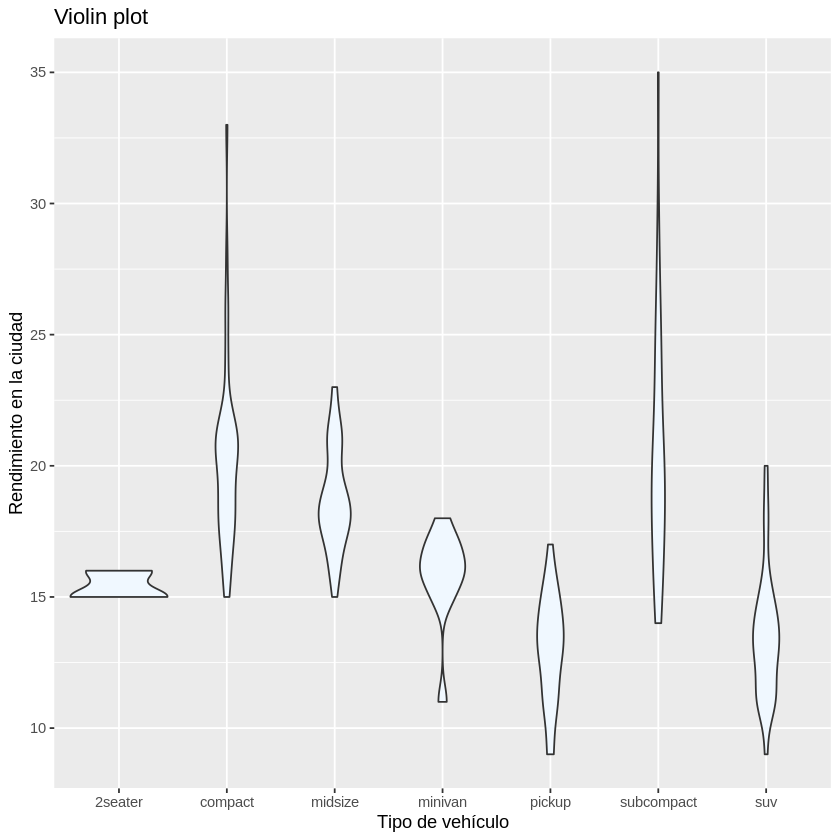

In [ ]:
# Con estas se obtiene la densidad de la distribución donde sólo alarga para valores atípicos
ggplot(data=mpg, aes(class,cty)) +
  geom_violin(fill='aliceblue') +
  labs(title='Violin plot', x='Tipo de vehículo', y='Rendimiento en la ciudad')

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# Queremos hacer multilineas
mpg_summary <- mpg %>% # son para continuar las instrucciones abajo
  group_by(class) %>%
  summarize(mean_cty=mean(cty), std_cty=sd(cty), n_cty=n(), se=std_cty/sqrt(n_cty), x_max=mean_cty+se, x_min=mean_cty-se)

In [ ]:
mpg_summary$class <- reorder(mpg_summary$class, mpg_summary$mean_cty) #agregamos la clase porque no la teniamos
mpg_summary

class,mean_cty,std_cty,n_cty,se,x_max,x_min
<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2seater,15.40000,0.5477226,5,0.2449490,15.64495,15.15505
compact,20.12766,3.3854999,47,0.4938259,20.62149,19.63383
midsize,18.75610,1.9465416,41,0.3039987,19.06010,18.45210
minivan,15.81818,1.8340219,11,0.5529784,16.37116,15.26520
pickup,13.00000,2.0463382,33,0.3562218,13.35622,12.64378
subcompact,20.37143,4.6023377,35,0.7779371,21.14937,19.59349
suv,13.50000,2.4208791,62,0.3074520,13.80745,13.19255


In [ ]:
# utilizamos el summary y ya no todo mpg
ggplot(mpg_summary, aes(mean_cty, y=class)) +
  geom_errorbarh(aes(mean_cty, xmax=x_max, ymin=x_min, y=class), height=0, color='gray60') +
  geom_point(col='black') +
  labs(title='Barras de error', x='Rendimiento', y='Clase')

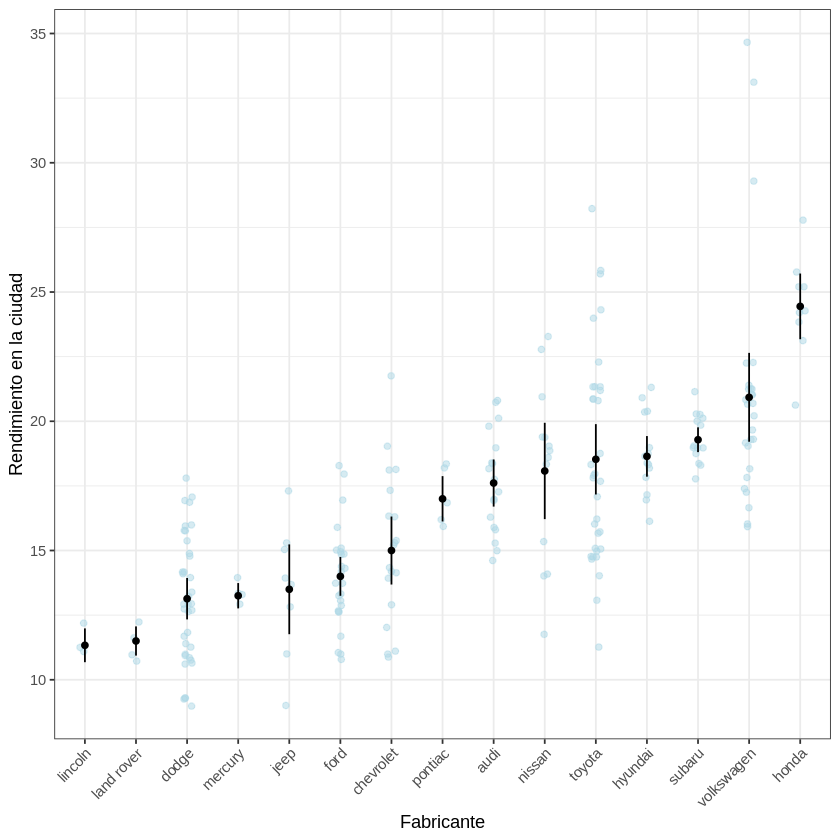

In [ ]:
ggplot(mpg, aes(x=reorder(manufacturer, cty, FUN=mean), y=cty)) +
  geom_jitter(colour='lightblue', alpha=0.5, width=0.1) + # jitter son todos los puntos que son un vehiculo
  geom_point(stat='summary', fun='mean') +
  geom_errorbar(stat='summary', fun.data='mean_se', fun.args=list(mult=1.96), width=0) +
  theme_bw() +
  theme(axis.text.x=element_text(angle = 45, hjust = 1)) + # nombres a 45°
  labs(x='Fabricante', y='Rendimiento en la ciudad')

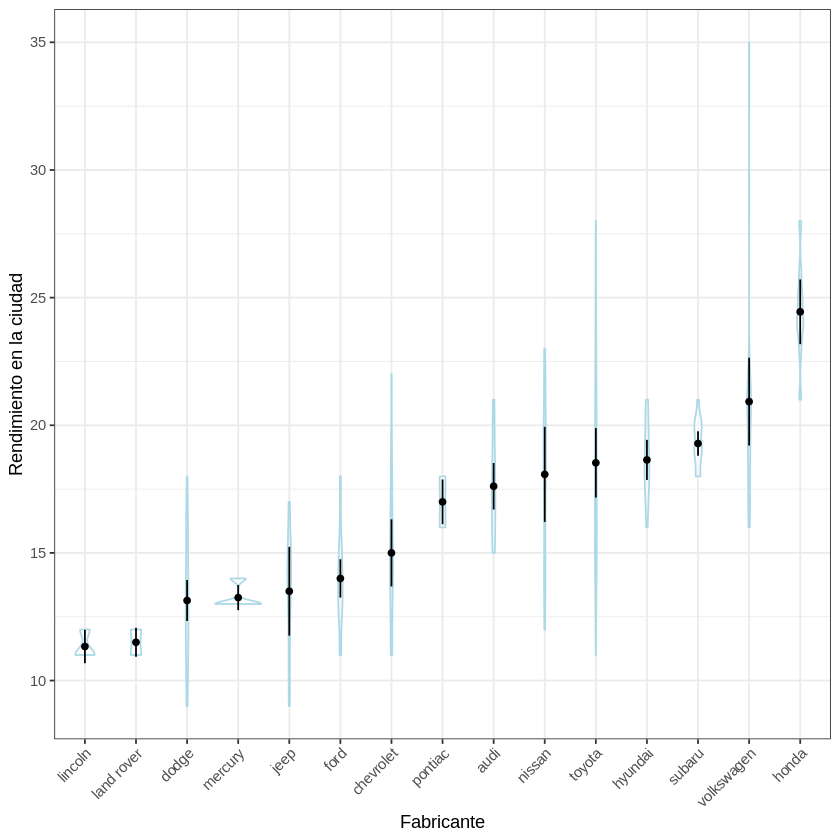

In [ ]:
# Mala visualización, ni si quiera se aprecian los ciolines, no muestra información para eso
ggplot(mpg, aes(x=reorder(manufacturer, cty, FUN=mean), y=cty)) +
  geom_violin(colour='lightblue', alpha=0.5) +
  geom_point(stat='summary', fun='mean') +
  geom_errorbar(stat='summary', fun.data='mean_se', fun.args=list(mult=1.96), width=0) +
  theme_bw() +
  theme(axis.text.x=element_text(angle = 45, hjust = 1)) + # nombres a 45°
  labs(x='Fabricante', y='Rendimiento en la ciudad')

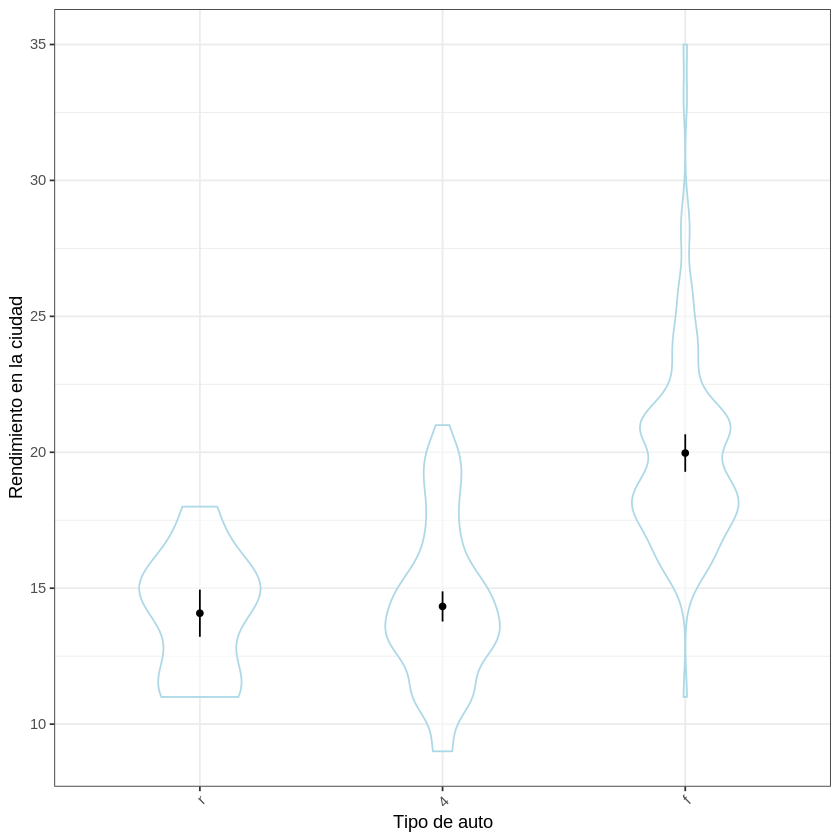

In [ ]:
# Para drv los violines si se aprecian bien
ggplot(mpg, aes(x=reorder(drv, cty, FUN=mean), y=cty)) +
  geom_violin(colour='lightblue', alpha=0.5, width=0.5) +
  geom_point(stat='summary', fun='mean') +
  geom_errorbar(stat='summary', fun.data='mean_se', fun.args=list(mult=1.96), width=0) +
  theme_bw() +
  theme(axis.text.x=element_text(angle = 45, hjust = 1)) + # nombres a 45°
  labs(x='Tipo de auto', y='Rendimiento en la ciudad')

# 22 Sep Seguimos con datos bidimensionales

In [ ]:
library(ggplot2)
library(scales)
library(RColorBrewer)

In [ ]:
set.seed(3939394)
data <- mpg[sample.int(nrow(mpg), size=200, replace=F),] # la , al final es para que no tome todo
#Reordenar
data$manufacturer<- reorder(data$manufacturer, data$cty)

In [ ]:
medianas <- aggregate(data$displ, list(data$manufacturer), FUN=median)
names(medianas) <- c('manufacturer','displ')
medianas$y_val <- as.numeric(medianas$manufacturer)
head(medianas)

,manufacturer,displ,y_val
,<fct>,<dbl>,<dbl>
1,lincoln,5.4,1
2,land rover,4.3,2
3,dodge,4.7,3
4,mercury,4.0,4
5,ford,4.6,5
6,jeep,4.2,6


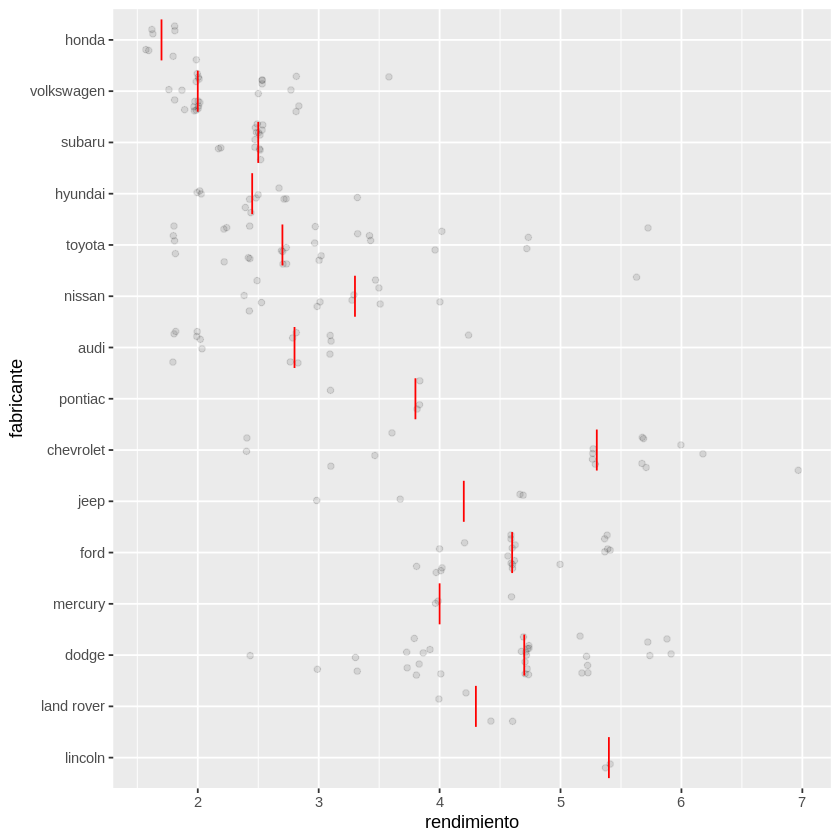

In [ ]:
# Las líneas rojas son la mediana sobre todos los datos
ggplot(data, aes(x=displ, y=manufacturer)) +
  geom_point(position=position_jitter(h=0.4), alpha=0.1) + #va a mover al puntito +/- 0.4, alpha es la transparencia
  labs(x='desplazamiento', y='fabricante') +
  geom_segment(data=medianas, aes(x=displ, xend=displ, y=y_val-0.4, yend=y_val+0.4),col='red')

In [ ]:
medianas <- aggregate(data$displ, list(drv=data$drv, manufacturer=data$manufacturer), FUN=median)
names(medianas) <- c('drv','manufacturer','displ')
medianas$y_val <- as.numeric(medianas$manufacturer)

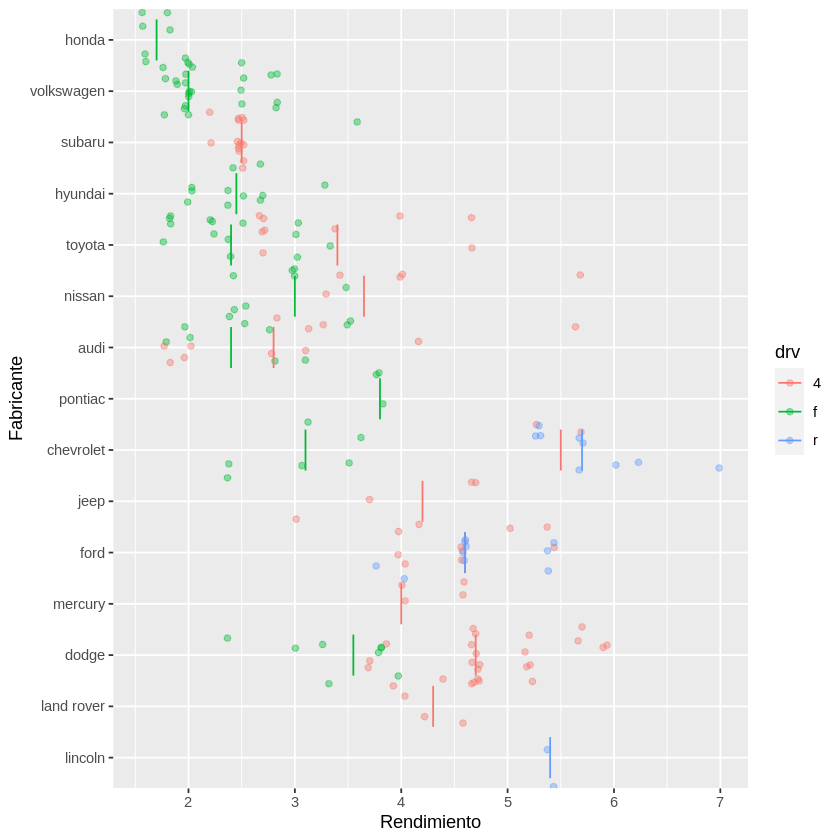

In [ ]:
# Mediana por tipo de tracción
ggplot(data, aes(x=displ, y=manufacturer, group=drv, col=drv)) +
  geom_point(position = position_jitter(h=0.6), alpha=0.4) +
  labs(x='Desplazamiento', y='Fabricante') +
  geom_segment(data=medianas, aes(x=displ, xend=displ, group=drv, col=drv, y=y_val-0.4, yend=y_val+0.4))
# los colores se refieren al tipo de tracción de los autos por cada marca, delantera, trasera, ...

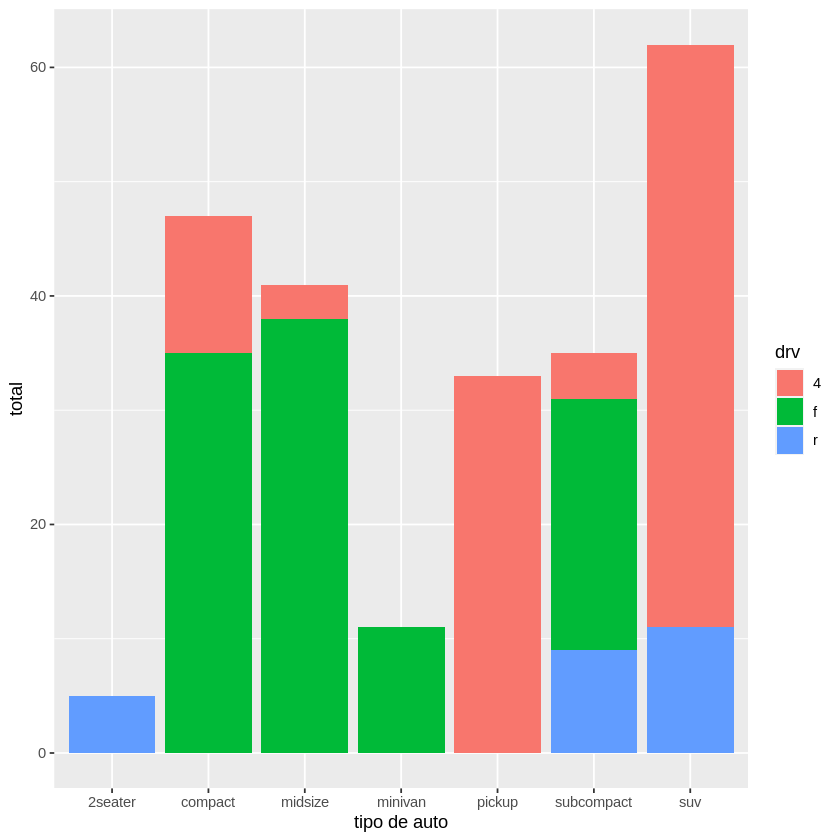

In [ ]:
ggplot(mpg) +
  geom_bar(aes(x=class, fill=drv)) + #drv ya es un factor porque tiene por valores(4,f,r)
  xlab('tipo de auto') +
  ylab('total')

Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


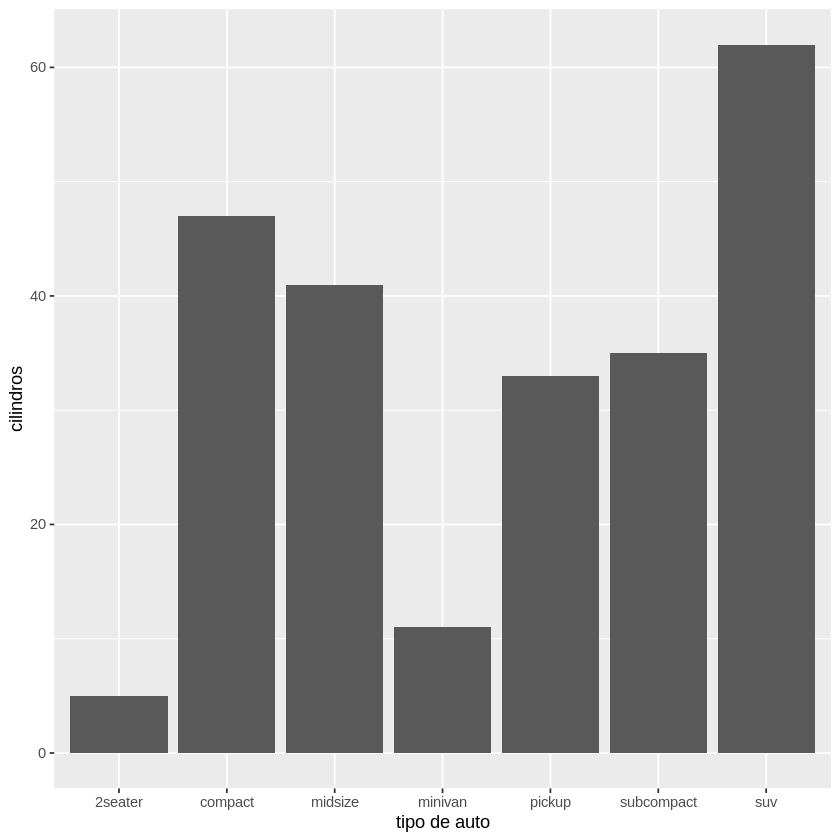

In [ ]:
# No están de colores
ggplot(mpg) +
  geom_bar(aes(x=class, fill=cyl)) +
  xlab('tipo de auto') +
  ylab('cilindros')

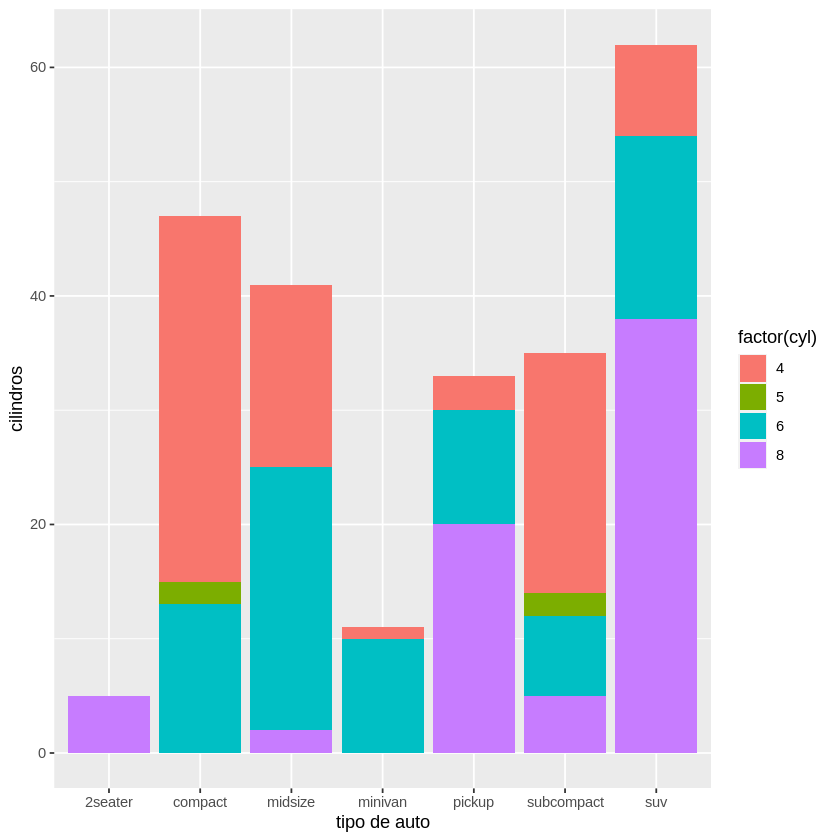

In [ ]:
# Para que la gráfica anterior se ponga de colores, la variable numérica cyl se tiene que escribir como factor
ggplot(mpg) +
  geom_bar(aes(x=class, fill=factor(cyl))) +
  xlab('tipo de auto') +
  ylab('cilindros')

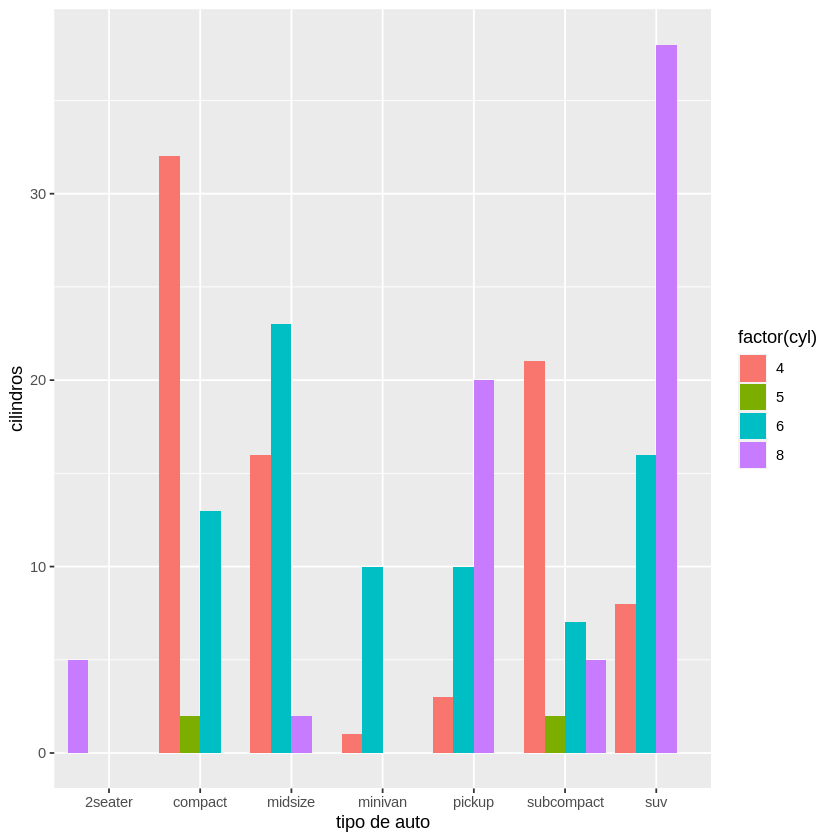

In [ ]:
ggplot(mpg) +
  geom_bar(aes(x=class, fill=factor(cyl)), position = position_dodge(preserve = 'single')) +
  xlab('tipo de auto') +
  ylab('cilindros')

In [ ]:
install.packages('ggrepel')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




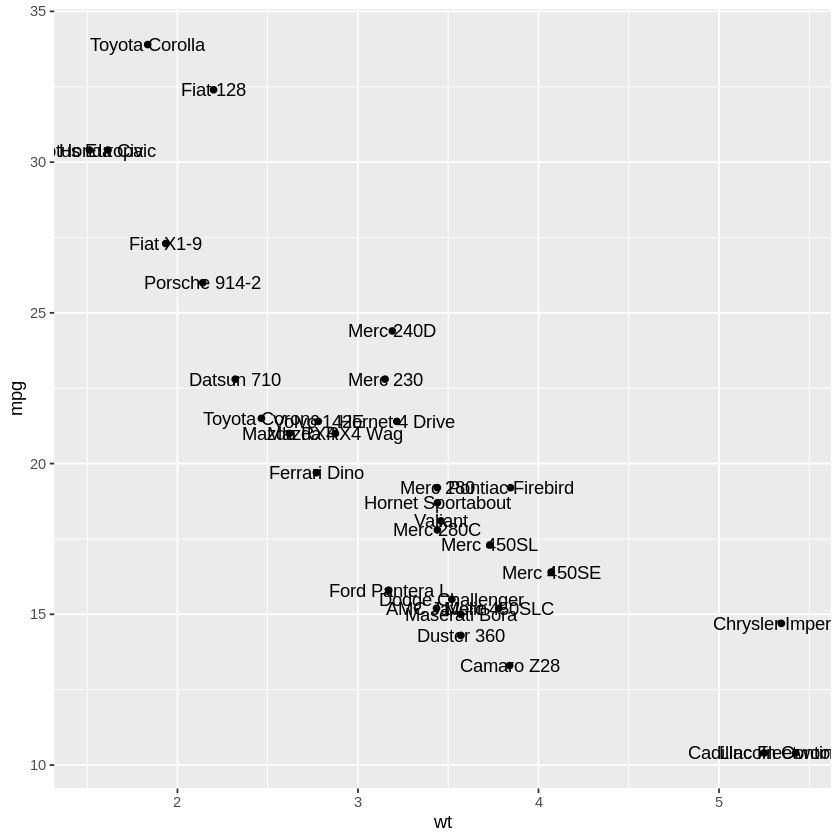

In [ ]:
ggl <- ggplot(mtcars, aes(x=wt, y=mpg, label=rownames(mtcars))) +
  geom_point()
ggl + geom_text()

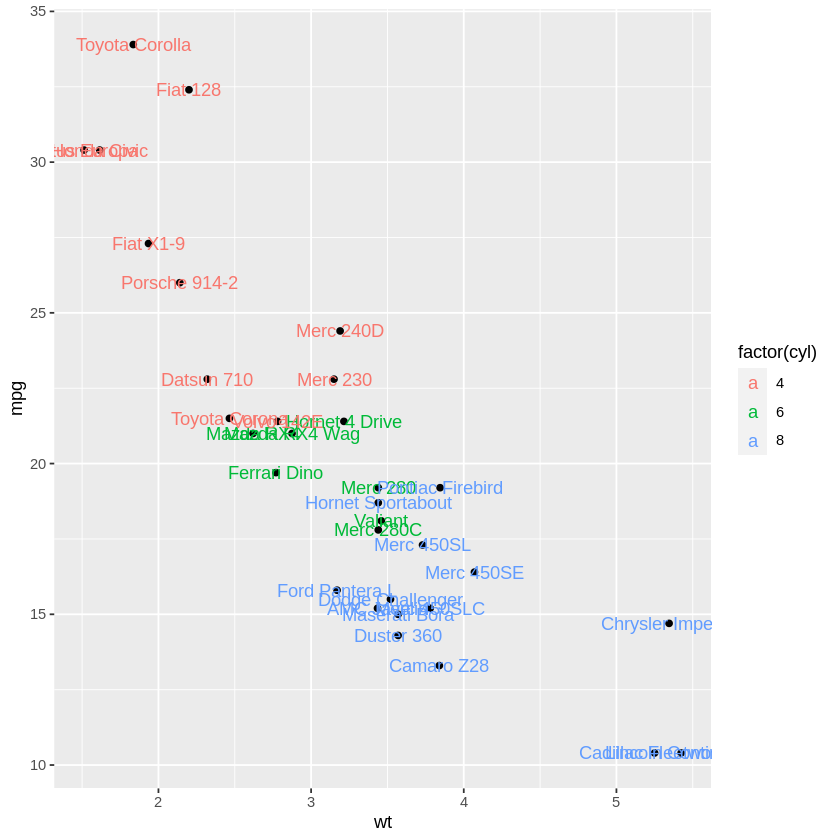

In [ ]:
gg2 <- ggplot(mtcars, aes(x=wt, y=mpg, label=rownames(mtcars))) +
  geom_point()
gg2 + geom_text(aes(color=factor(cyl)))

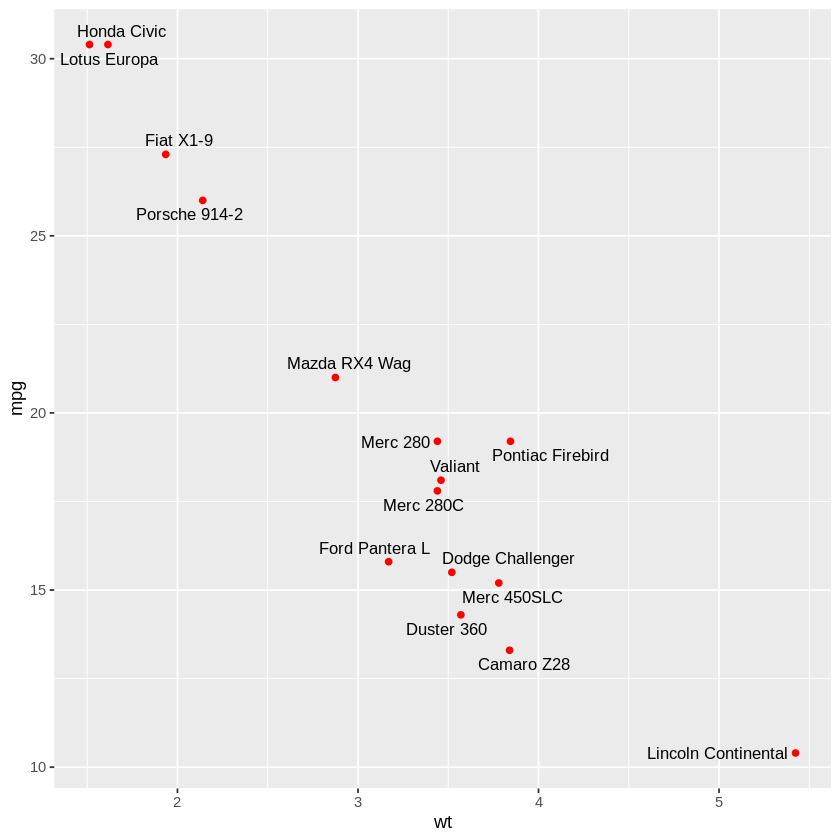

In [ ]:
# Vamos a usar repel para separar los textos
library(ggrepel)
set.seed(12345)
ss <- sample(1:32,15)
df <- mtcars[ss,] # , como la de antes
gg3 <- ggplot(df, aes(wt,mpg)) +
  geom_point(color='red')
gg3 + geom_text_repel(aes(label=rownames(df)), size=3.5)

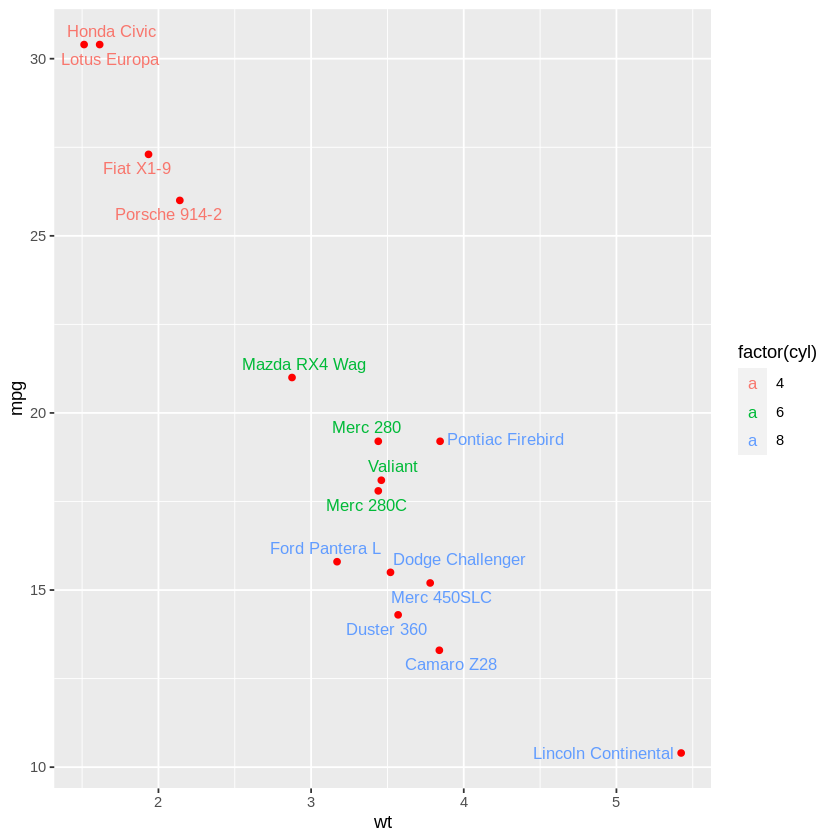

In [ ]:
gg4 <- ggplot(df, aes(wt,mpg)) +
  geom_point(color='red')
gg4 + geom_text_repel(aes(label=rownames(df), color=factor(cyl)), size=3.5)

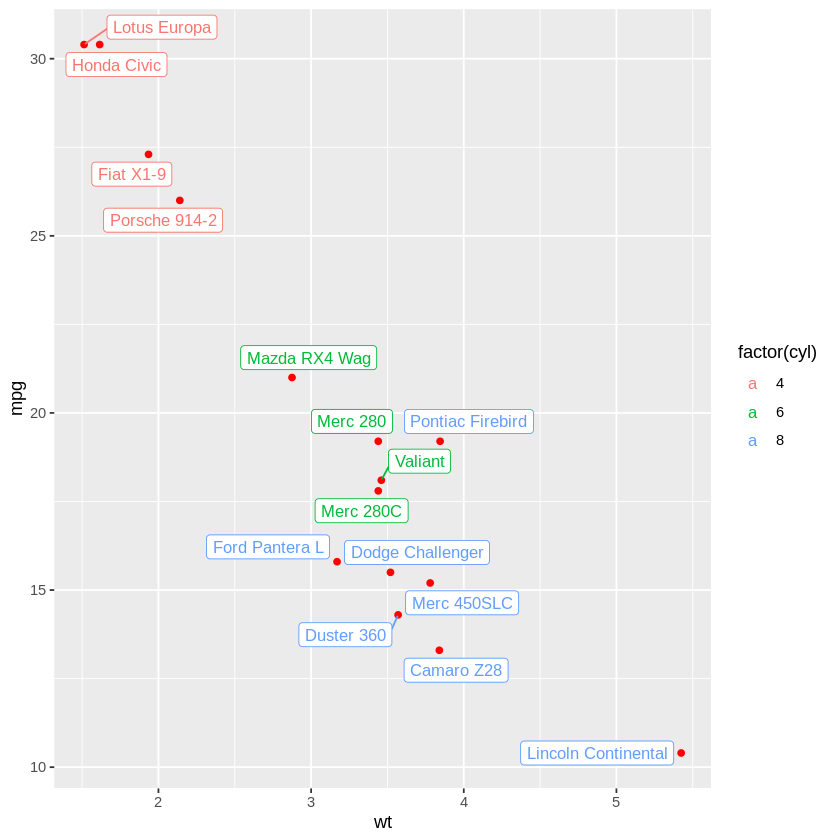

In [ ]:
gg5 <- ggplot(df, aes(wt,mpg)) +
  geom_point(color='red')
gg5 + geom_label_repel(aes(label=rownames(df), color=factor(cyl)), size=3.5)

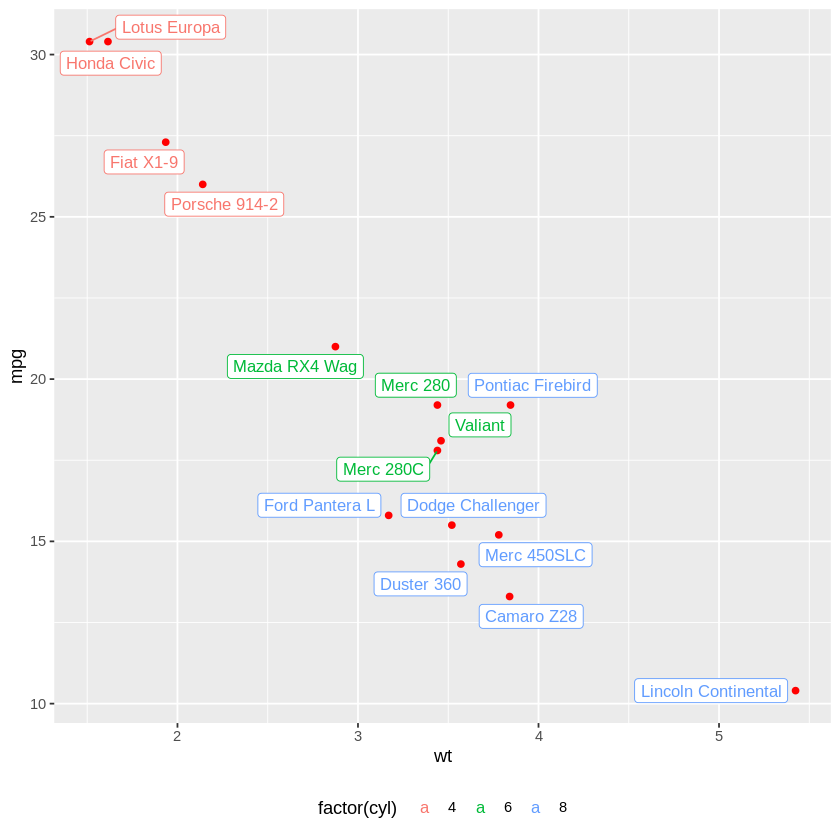

In [ ]:
gg6 <- ggplot(df, aes(wt,mpg)) +
  geom_point(color='red')
gg6 + geom_label_repel(aes(label=rownames(df), color=factor(cyl)), size=3.5) +
  theme(legend.position = 'bottom')

#TAREA:

Hacer las gráficas 3D en R, creando un intervalo de confianza

# Medir la cantidad de grasa corporal

In [ ]:
install.packages('DAAG')
library(DAAG)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
head(ais)

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
6,4.10,4.4,37.4,12.5,42,21.04,75.2,15.58,53.77,174.0,63.7,f,B_Ball


In [ ]:
str(ais)

'data.frame':	202 obs. of  13 variables:
 $ rcc   : num  3.96 4.41 4.14 4.11 4.45 4.1 4.31 4.42 4.3 4.51 ...
 $ wcc   : num  7.5 8.3 5 5.3 6.8 4.4 5.3 5.7 8.9 4.4 ...
 $ hc    : num  37.5 38.2 36.4 37.3 41.5 37.4 39.6 39.9 41.1 41.6 ...
 $ hg    : num  12.3 12.7 11.6 12.6 14 12.5 12.8 13.2 13.5 12.7 ...
 $ ferr  : num  60 68 21 69 29 42 73 44 41 44 ...
 $ bmi   : num  20.6 20.7 21.9 21.9 19 ...
 $ ssf   : num  109.1 102.8 104.6 126.4 80.3 ...
 $ pcBfat: num  19.8 21.3 19.9 23.7 17.6 ...
 $ lbm   : num  63.3 58.5 55.4 57.2 53.2 ...
 $ ht    : num  196 190 178 185 185 ...
 $ wt    : num  78.9 74.4 69.1 74.9 64.6 63.7 75.2 62.3 66.5 62.9 ...
 $ sex   : Factor w/ 2 levels "f","m": 1 1 1 1 1 1 1 1 1 1 ...
 $ sport : Factor w/ 10 levels "B_Ball","Field",..: 1 1 1 1 1 1 1 1 1 1 ...


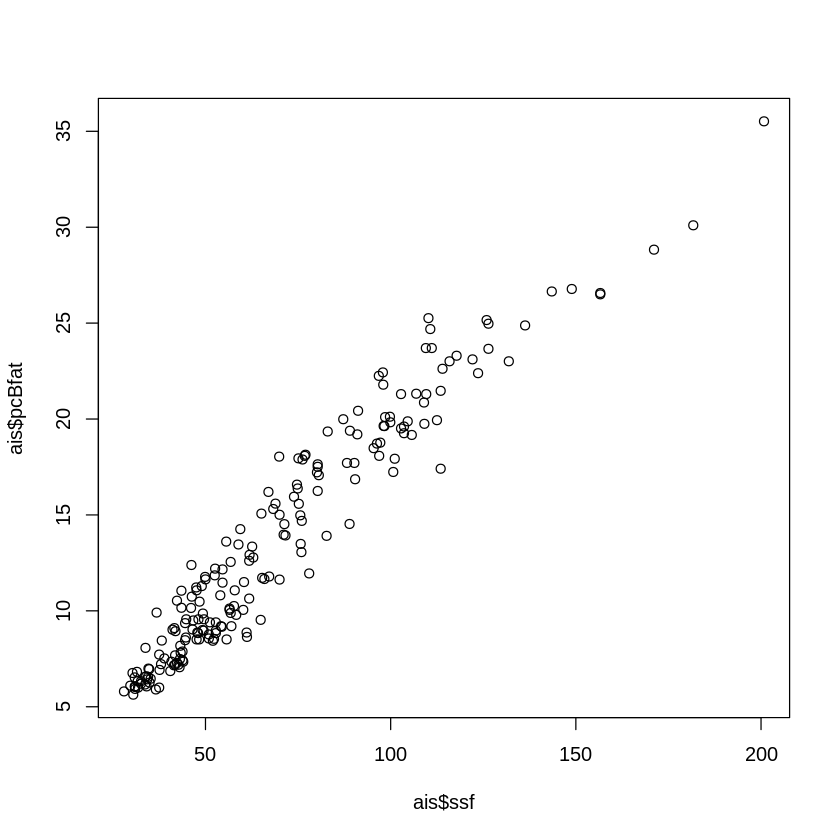

In [ ]:
plot(ais$ssf, ais$pcBfat)

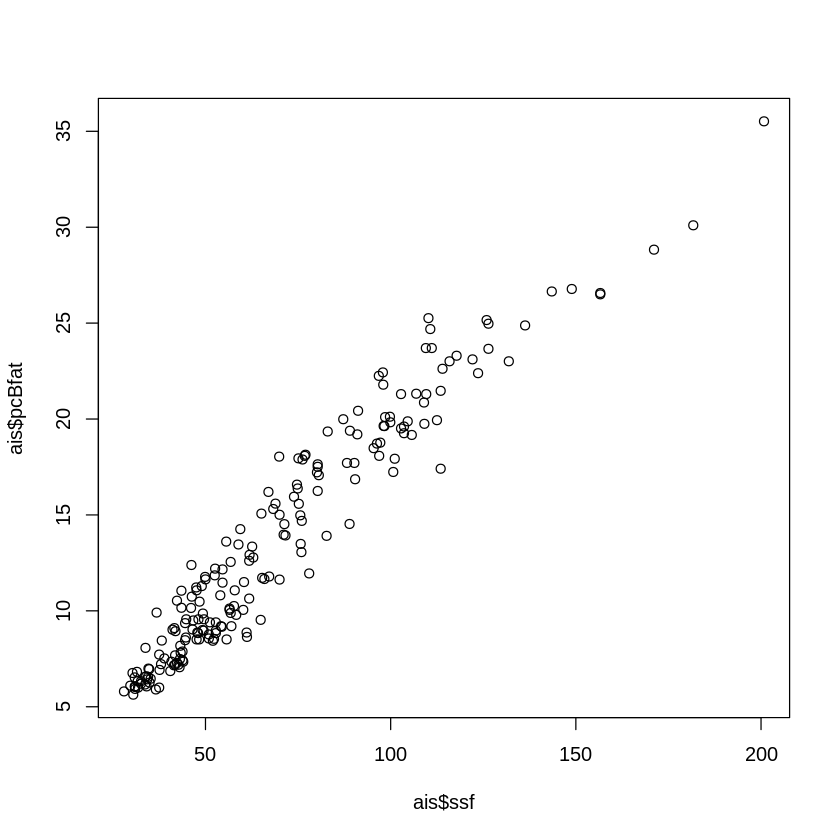

In [ ]:
plot(ais$ssf, ais$pcBfat)

In [ ]:
abline(lm(ais$pcBfat ~ ais$ssf))

ERROR: ignored

In [ ]:
abline(lm(ais$pcBfat - ais$ssf))

ERROR: ignored

In [ ]:
str(lm(ais$pcBfat -ais$ssf))

ERROR: ignored

ERROR: ignored

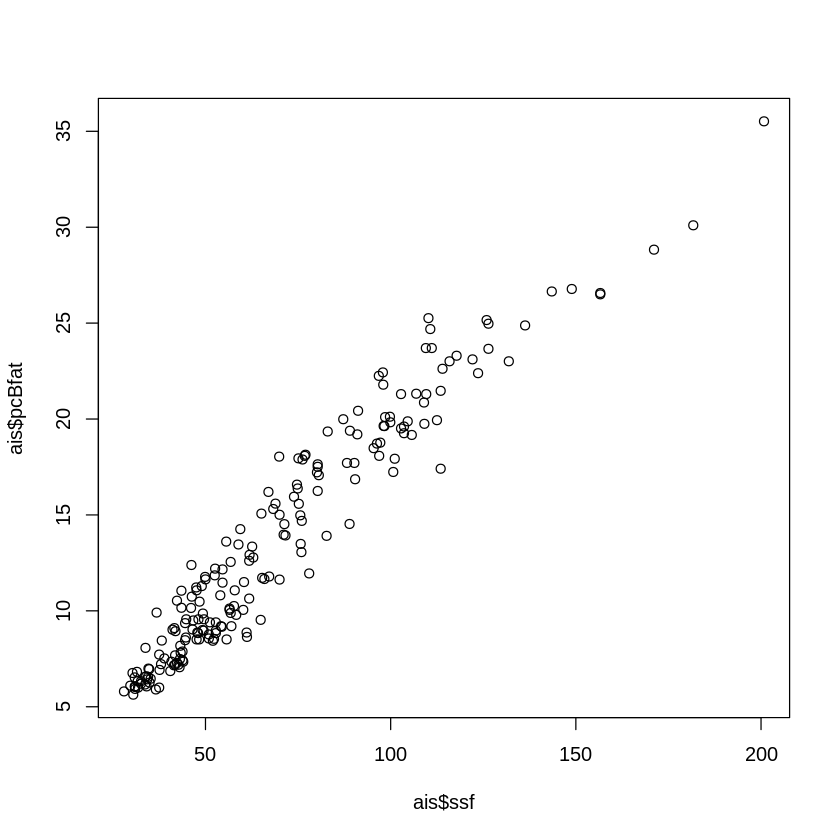

In [ ]:
plot(ais$ssf, ais$pcBfat)
abline(lm(ais$pcBfat - ais$ssf))

In [ ]:
b <- lm(ais$pcBfat -ais$ssf)$coeficients
b

ERROR: ignored

In [ ]:
mujeres <- which

In [ ]:
Conclusión: Sí se

TAREA:

Implementar el cálculo de los estimadores Programa:

Utilizar el conjunto de R 2 columnas

tethas, error y varianza de las bethas

Modelo para cada una de ellas

Gráficas